In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sax
from simphony.quantum import QuantumSim,compose_qstate,CoherentState,SqueezedState
from functools import partial
import jax
import quantp as qp
import thewalrus as tw
from simphony.quantum import plot_quantum_result
from simphony.classical import ClassicalSim
from scipy.special import factorial
import jax.numpy as jnp
from scipy.stats import multivariate_normal
from thewalrus import _hafnian as hf
from thewalrus.quantum.conversions import Amat,Qmat
from thewalrus import hafnian as hafn

In [3]:
from gbs_func import phot_cir,sampler,angles,trans,sub_mat

In [4]:
inst,conn,ports=phot_cir(8,8)
r=sampler(inst,conn,ports,wl=1.55)

theta array is None
phi array is None


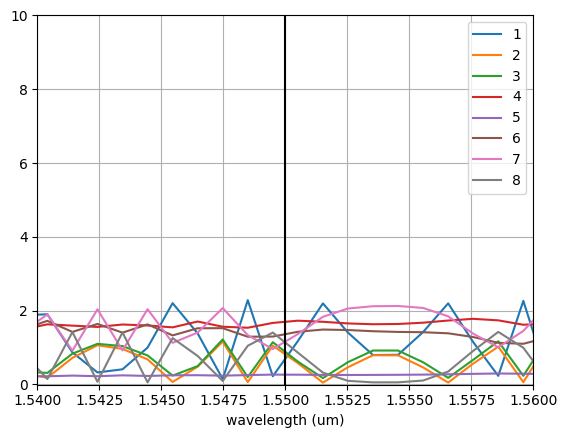

In [5]:
wl=np.linspace(1.5,1.6,100)
theta_arr,phi_arr,U=angles(8)

f=plt.figure()
k=1
# theta_arr=np.random.rand(28)
# theta_arr=np.multiply(0.5,theta_arr)
# phi_arr=np.random.rand(28)
# theta_arr=np.ones(28)*0.125


sim3=ClassicalSim(ckt=sampler,wl=wl,a=inst,b=conn,c=ports,theta_arr=theta_arr,phi_arr=phi_arr)
laser_1 = sim3.add_laser(ports=["int1"], power=0.0)
laser_2 = sim3.add_laser(ports=["inb1"], power=0.0)
laser_3 = sim3.add_laser(ports=["int2"], power=0.0)
laser_4 = sim3.add_laser(ports=["inb2"], power=8.0)

laser_5 = sim3.add_laser(ports=["int3"], power=0.0)
laser_6 = sim3.add_laser(ports=["inb3"], power=0.0)
laser_7 = sim3.add_laser(ports=["int4"], power=0.0)
laser_8 = sim3.add_laser(ports=["inb4"], power=0.0)


detector_1 = sim3.add_detector(ports=["outt1"])
detector_2 = sim3.add_detector(ports=["outb1"])
detector_3 = sim3.add_detector(ports=["outt2"])
detector_4 = sim3.add_detector(ports=["outb2"])

detector_5 = sim3.add_detector(ports=["outt3"])
detector_6 = sim3.add_detector(ports=["outb3"])
detector_7 = sim3.add_detector(ports=["outt4"])
detector_8 = sim3.add_detector(ports=["outb4"])
result = sim3.run()
        
plt.plot(wl, np.abs(result.sdict['outt1'])**2, label='1')
plt.plot(wl, np.abs(result.sdict['outb1'])**2, label='2')
plt.plot(wl, np.abs(result.sdict['outt2'])**2, label='3')
plt.plot(wl, np.abs(result.sdict['outb2'])**2, label='4')

plt.plot(wl, np.abs(result.sdict['outt3'])**2, label='5')
plt.plot(wl, np.abs(result.sdict['outb3'])**2, label='6')
plt.plot(wl, np.abs(result.sdict['outt4'])**2, label='7')
plt.plot(wl, np.abs(result.sdict['outb4'])**2, label='8')

plt.axvline(x=1.55, color='k')
plt.legend()
plt.grid()
plt.ylim([-0.01,10.01])
plt.xlim([1.49,1.61])
plt.xlim([1.54,1.56])
plt.xlabel("wavelength (um)")
k=k+1


 


In [6]:
mean_photon_number = 1
r = np.arcsinh(np.sqrt(mean_photon_number))
print("Sq  param: ")
print(r)

Sq  param: 
0.881373587019543


In [7]:
# r=0.6
s_sq = np.sinh(r)**2
alpha_sq = 1 - s_sq

if alpha_sq >= 0:
    alpha = np.sqrt(alpha_sq)
else:
    alpha = None
print(alpha)


0.0


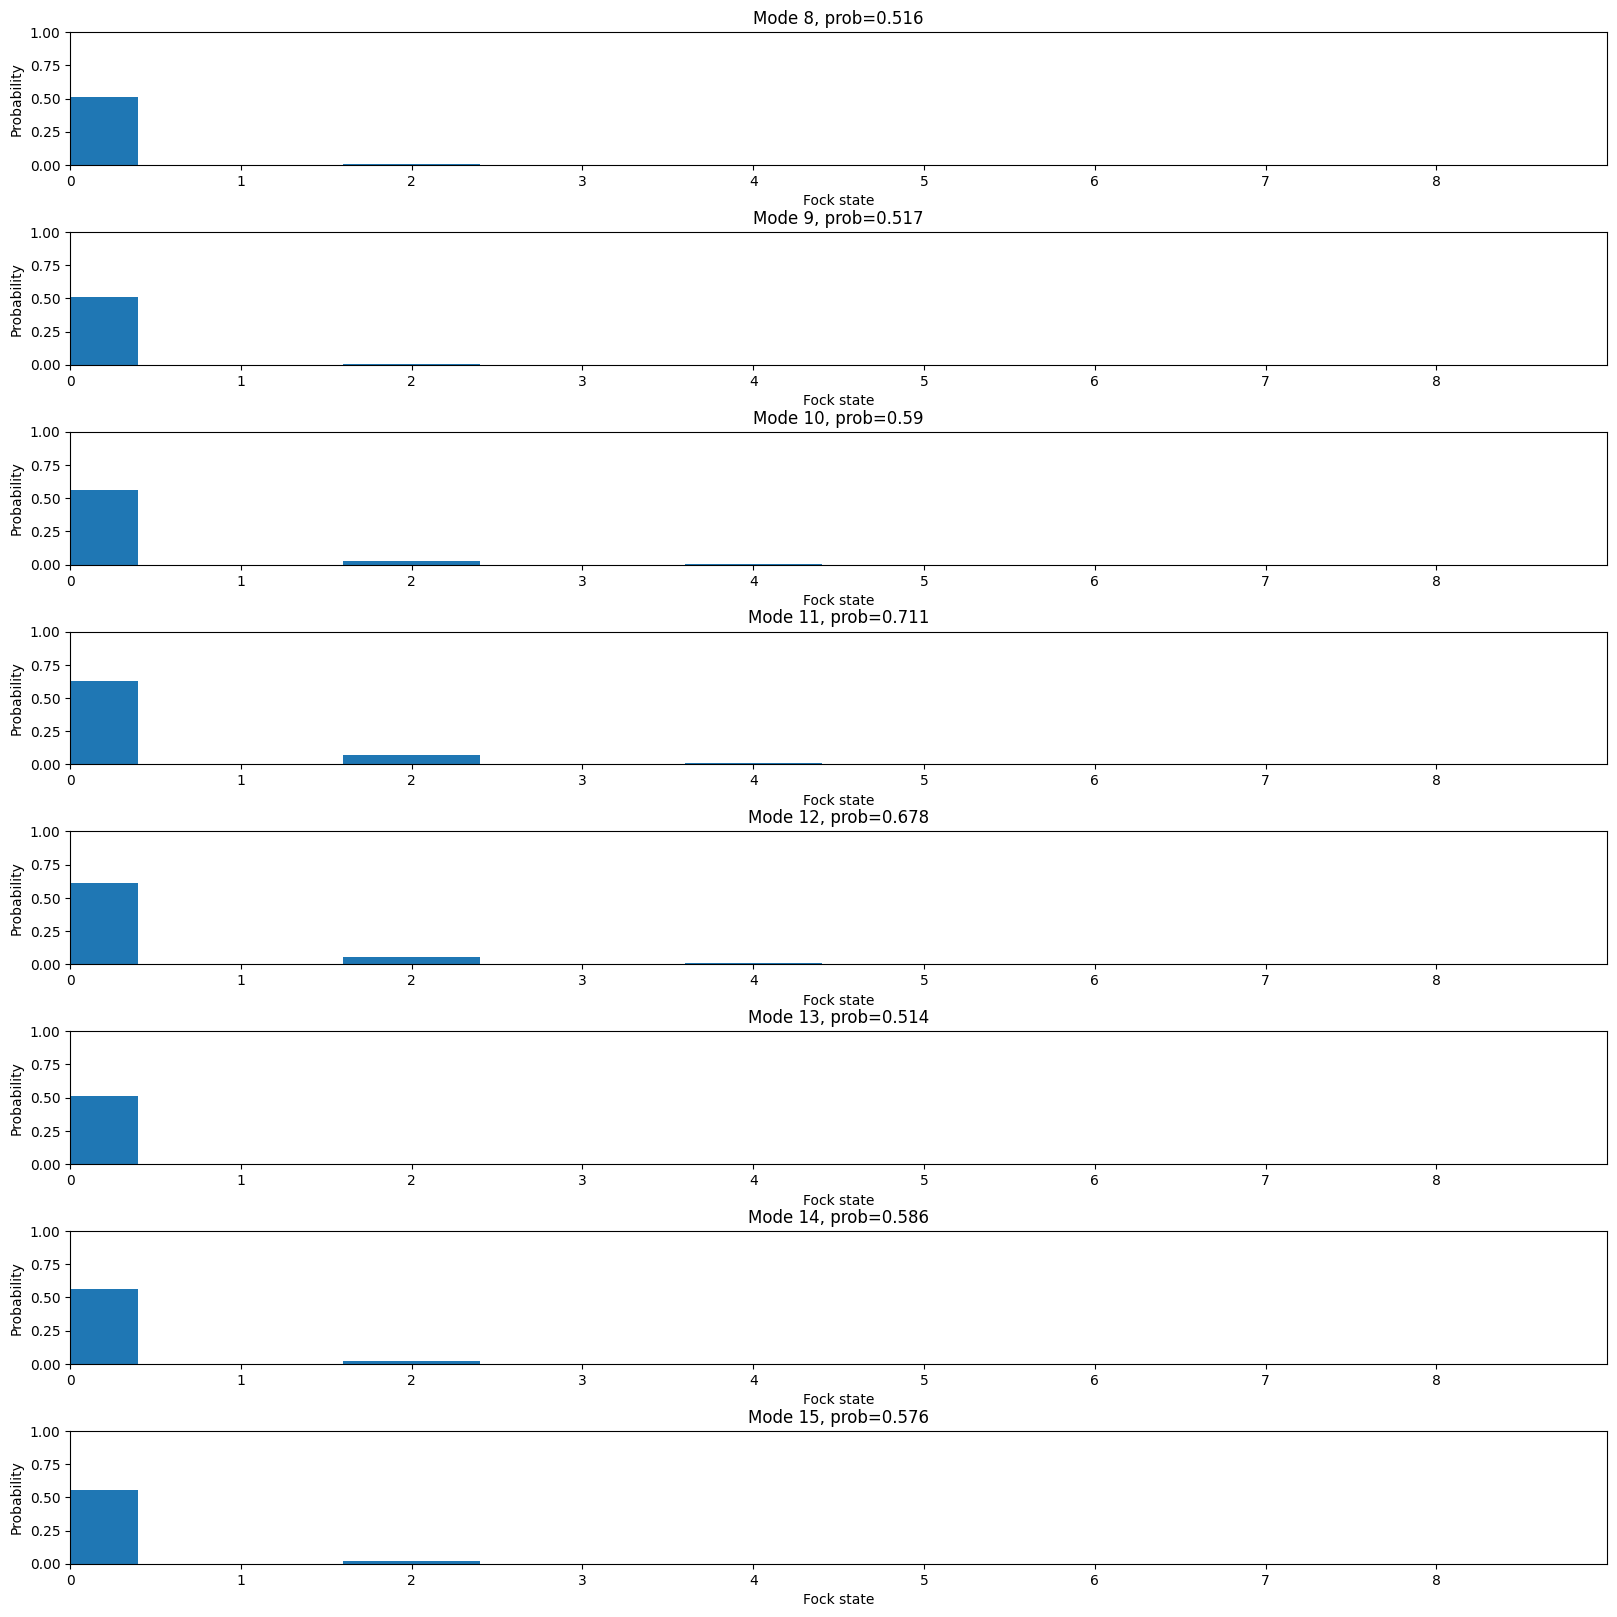

In [8]:
wl=1.55
r=0.881373587019543

sim=QuantumSim(ckt=sampler,wl=wl,a=inst,b=conn,c=ports,theta_arr=theta_arr,phi_arr=phi_arr)

i1=SqueezedState(port="int1",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)
i2=SqueezedState(port="inb1",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)
i3=SqueezedState(port="int2",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)
i4=SqueezedState(port="inb2",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)
i5=SqueezedState(port="int3",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)
i6=SqueezedState(port="inb3",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)
i7=SqueezedState(port="int4",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)
i8=SqueezedState(port="inb4",r=r,alpha=0*np.exp(2*np.pi*0.0),phi=2*np.pi*0.0)

qstate=compose_qstate(i1,i2,i3,i4,i5,i6,i7,i8)

sim.add_qstate(qstate=qstate)
res=sim.run()
res_state=res.state()
# i2.plot_mode(mode=0)



fig,ax=plt.subplots(8,1,figsize=(16,16))
cutoff=9
k=0
ind=0

pdf=np.zeros((8,cutoff))
for i in range(8,16):
        means, cov = res_state.modes(i)
        fock_amp = tw.quantum.state_vector(means, cov, cutoff=cutoff, hbar=1/2, check_purity=False)
        # ax=plt.subplot(2,2,i-1)

        prob=np.sum(abs(fock_amp)**2) 
        prob=round(prob,3)   
        p_arr=np.array(abs(fock_amp)**2)
        # p_arr=p_arr/np.sum(p_arr)
        # prob=round(np.sum(p_arr),3)
        # if k>=8:
        pdf[k]=p_arr
        #  ind+=1

        # ax[i].set_title(f'Mode {i}, prob={prob}')
       

        # ax[k].bar(range(len(fock_amp)), abs(fock_amp) ** 2)
        ax[k].bar(range(len(fock_amp)), p_arr)
        ax[k].set_xticks(range(len(fock_amp)))
        ax[k].set_xlabel("Fock state")
        ax[k].set_ylabel("Probability")
        ax[k].set_ylim([0, 1])
        ax[k].set_xlim([0, cutoff])
        ax[k].set_title(f'Mode {i}, prob={prob}')
        k+=1

# plt.tight_layout()
plt.tight_layout(pad=0.1)
plt.show()

In [9]:
from simphony.utils import xxpp_to_xpxp
import pandas as pd

In [10]:
cv=res_state.cov
V=cv[15:31,15:31]
# cov_mat=xxpp_to_xpxp(res_state.cov)
# Cov_mat=cov_mat[15:31,15:31]
# dat=pd.DataFrame(Cov_mat)
dat=pd.DataFrame(V)

# res_state.modes(31)
# len(cov_mat)
dat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3.267241e-01,4.902345e-10,6.512650e-09,2.181964e-08,-4.865154e-08,2.168700e-10,-7.684568e-10,-6.123752e-09,-1.943343e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4.902345e-10,2.500000e-01,-1.136027e-15,9.801188e-17,1.866996e-16,2.925630e-15,1.065669e-15,-1.580767e-16,9.378349e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,6.512650e-09,-1.136027e-15,2.500000e-01,-3.567025e-16,5.037203e-16,-3.411171e-17,-5.828535e-16,2.949030e-17,-1.346037e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2.181964e-08,9.801188e-17,-3.567025e-16,2.500000e-01,-7.251144e-16,1.455541e-17,-1.597680e-15,2.997602e-15,3.361027e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,-4.865154e-08,1.866996e-16,5.037203e-16,-7.251144e-16,2.500000e-01,3.755947e-16,8.034480e-16,7.632783e-17,-7.968886e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2.168700e-10,2.925630e-15,-3.411171e-17,1.455541e-17,3.755947e-16,2.500000e-01,-5.340882e-16,-1.986258e-16,1.724017e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,-7.684568e-10,1.065669e-15,-5.828535e-16,-1.597680e-15,8.034480e-16,-5.340882e-16,2.500000e-01,5.722419e-16,2.697631e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,-6.123752e-09,-1.580767e-16,2.949030e-17,2.997602e-15,7.632783e-17,-1.986258e-16,5.722419e-16,2.500000e-01,-1.027390e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,-1.943343e-09,9.378349e-17,-1.346037e-16,3.361027e-17,-7.968886e-16,1.724017e-16,2.697631e-16,-1.027390e-15,2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01,-2.901325e-16,-3.768687e-16,5.811324e-17,-8.257284e-16,-5.117434e-16,7.650131e-16


In [11]:
from gbs_func import find_combinations
# Example usage:

target_number = 8
print(f"Number combinations that sum up to {target_number} with all even numbers:")
comb_dict = {}
cind = 0  # Initialize cind outside of the function
find_combinations(target_number, [], 2, comb_dict)
# print("Combinations stored in comb_dict:")
# print(comb_dict)
comb_dict

Number combinations that sum up to 8 with all even numbers:


{5: [2, 2, 2, 2], 6: [2, 2, 4], 7: [2, 6], 8: [4, 4], 9: [8]}

In [49]:
comb_mat=np.zeros((len(comb_dict),8),dtype=int)
i=0
for key,value in comb_dict.items():
    v=len(value)
    z=np.zeros(8-v,dtype=int)
    val=np.array(value)
    new_val=np.concatenate((val,z),dtype=int)
    comb_mat[i]=new_val
    i+=1
from itertools import permutations

def shuffle_array(array):
    
    all_permutations = permutations(array)
    all_permutations_list = list(all_permutations)
    new_list=np.array(all_permutations_list,dtype=int)
    
    return new_list
comb_mat

array([[2, 2, 2, 2, 0, 0, 0, 0],
       [2, 2, 4, 0, 0, 0, 0, 0],
       [2, 6, 0, 0, 0, 0, 0, 0],
       [4, 4, 0, 0, 0, 0, 0, 0],
       [8, 0, 0, 0, 0, 0, 0, 0]])

In [72]:
# A=Amat(Cov_mat)
# Q=Qmat(Cov_mat)
cv=V
A=Amat(cv)
Q=Qmat(cv)
Cov=cv
dt=np.linalg.det(Q)
det=1/(np.sqrt(np.abs(dt)))
det

41.689295655427415

In [81]:
tr_mat=np.arange(64).reshape((8,8))
tr_mat

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [83]:
from simphony.quantum import xxpp_to_xpxp,xpxp_to_xxpp

xxpp_to_xpxp(tr_mat)

array([[ 0,  4,  1,  5,  2,  6,  3,  7],
       [32, 36, 33, 37, 34, 38, 35, 39],
       [ 8, 12,  9, 13, 10, 14, 11, 15],
       [40, 44, 41, 45, 42, 46, 43, 47],
       [16, 20, 17, 21, 18, 22, 19, 23],
       [48, 52, 49, 53, 50, 54, 51, 55],
       [24, 28, 25, 29, 26, 30, 27, 31],
       [56, 60, 57, 61, 58, 62, 59, 63]])

In [16]:
ar=[1,0,0,0]
sub_mat(tr_mat,ar)

array([[ 0.,  4.],
       [ 4., 36.]])

In [17]:
arr=[1,1,1,0,0,0,0,0]
A=sub_mat(V,arr)
A
ar=[0,0,2] 
a=sub_mat(A,ar)
hf._haf(a)
 
# Q=Qmat(A)
# Q
# dt=np.linalg.det(Q)
# np.abs(dt)

(0.0625000000000061+0j)

In [18]:
# elif m==max(range(8)):
                
            #     if np.sum(ar)!=8:
            #         None
            #     else:
            #         fact=1
            #         for factor in ar:
            #             fact=fact*factorial(factor)      
            #         As=sub_mat(A,ar)
            #         haf=hf._haf(As)
            #         prob=haf/(det*fact)
            #         prob=prob/prev_prob[pind]
                    
            #         prob_mat.append(prob.real)


            #         inter_prob.append(prob)         
            #         next_mat.append(ar)

In [73]:
#cond prob def

def probability(A,ar,det):
    fact=1
    for factor in ar:
        fact*=factorial(factor)      
    As=sub_mat(A,ar)
    haf=np.abs(hf._haf(As)) 
    prob=haf*det/(fact)
    return prob

In [75]:
possibilities=perm_mat
probability_mat=[]
for poss in possibilities:
    pro=probability(cv,poss,det)
    probability_mat.append(pro)

In [77]:
np.sum(probability_mat)
probability_mat=probability_mat/np.sum(probability_mat)

In [80]:
probability_mat

array([7.64575655e-01, 2.38929892e-02, 1.11998387e-03, 5.83324932e-05,
       3.19005822e-06, 2.38929892e-02, 7.46655913e-04, 3.49994959e-05,
       1.82289041e-06, 1.11998387e-03, 3.49994959e-05, 1.64060137e-06,
       5.83324932e-05, 1.82289041e-06, 3.19005822e-06, 2.38929892e-02,
       7.46655913e-04, 3.49994959e-05, 1.82289041e-06, 7.46655913e-04,
       2.33329973e-05, 1.09373425e-06, 3.49994959e-05, 1.09373425e-06,
       1.82289041e-06, 1.11998387e-03, 3.49994959e-05, 1.64060137e-06,
       3.49994959e-05, 1.09373425e-06, 1.64060137e-06, 5.83324932e-05,
       1.82289041e-06, 1.82289041e-06, 3.19005822e-06, 2.38929892e-02,
       7.46655913e-04, 3.49994959e-05, 1.82289041e-06, 7.46655913e-04,
       2.33329973e-05, 1.09373425e-06, 3.49994959e-05, 1.09373425e-06,
       1.82289041e-06, 7.46655913e-04, 2.33329973e-05, 1.09373425e-06,
       2.33329973e-05, 7.29156165e-07, 1.09373425e-06, 3.49994959e-05,
       1.09373425e-06, 1.09373425e-06, 1.82289041e-06, 1.11998387e-03,
      

In [20]:
c_ar=[0,2,4,6,8]
c_ar=[0,2]

perm_mat=[[]]

prev_prob=[1]
arr=np.zeros(8,dtype=int)

for m in range(8):
    # m_array=np.array([m])
    # inds = np.concatenate((0, (m_array + 8)))
    # A=Cov[np.ix_(inds,inds)]
    arr[m]=1
    A=sub_mat(V,arr)
    
    Q=Qmat(A)
    dt=np.linalg.det(Q)
    det=1/(np.sqrt(np.abs(dt)))

    next_mat=[]
    inter_prob=[]
    pind=0
    prob_mat=[]
    for perm in perm_mat:       
        
        for a in c_ar:         
            ar=perm.copy()
            ar.append(a) 

            if np.sum(ar)>8:
                break
            
            else:
                prob=probability(A,ar,det)
                prob=prob/prev_prob[pind]                    
                prob_mat.append(np.abs(prob))
                inter_prob.append(np.abs(prob))         
                next_mat.append(ar)

        pind+=1
    prev_prob=inter_prob
    perm_mat=next_mat
   

In [51]:
p=np.sum(prob_mat)
perm_mat

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 6],
 [0, 0, 0, 0, 0, 0, 0, 8],
 [0, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 0, 0, 0, 2, 2],
 [0, 0, 0, 0, 0, 0, 2, 4],
 [0, 0, 0, 0, 0, 0, 2, 6],
 [0, 0, 0, 0, 0, 0, 4, 0],
 [0, 0, 0, 0, 0, 0, 4, 2],
 [0, 0, 0, 0, 0, 0, 4, 4],
 [0, 0, 0, 0, 0, 0, 6, 0],
 [0, 0, 0, 0, 0, 0, 6, 2],
 [0, 0, 0, 0, 0, 0, 8, 0],
 [0, 0, 0, 0, 0, 2, 0, 0],
 [0, 0, 0, 0, 0, 2, 0, 2],
 [0, 0, 0, 0, 0, 2, 0, 4],
 [0, 0, 0, 0, 0, 2, 0, 6],
 [0, 0, 0, 0, 0, 2, 2, 0],
 [0, 0, 0, 0, 0, 2, 2, 2],
 [0, 0, 0, 0, 0, 2, 2, 4],
 [0, 0, 0, 0, 0, 2, 4, 0],
 [0, 0, 0, 0, 0, 2, 4, 2],
 [0, 0, 0, 0, 0, 2, 6, 0],
 [0, 0, 0, 0, 0, 4, 0, 0],
 [0, 0, 0, 0, 0, 4, 0, 2],
 [0, 0, 0, 0, 0, 4, 0, 4],
 [0, 0, 0, 0, 0, 4, 2, 0],
 [0, 0, 0, 0, 0, 4, 2, 2],
 [0, 0, 0, 0, 0, 4, 4, 0],
 [0, 0, 0, 0, 0, 6, 0, 0],
 [0, 0, 0, 0, 0, 6, 0, 2],
 [0, 0, 0, 0, 0, 6, 2, 0],
 [0, 0, 0, 0, 0, 8, 0, 0],
 [0, 0, 0, 0, 2, 0, 0, 0],
 [0, 0, 0, 0, 2, 0, 0, 2],
 

In [22]:

# prob_new

c_ar=[0,2,4,6,8]
# c_ar=[0,2]

perm_mat=[[]]


prev_prob=[1]
arr=np.zeros(8,dtype=int)

for m in range(8):
    # m_array=np.array([m])
    # inds = np.concatenate((0, (m_array + 8)))
    # A=Cov[np.ix_(inds,inds)]
    arr[m]=1
    A=sub_mat(V,arr)
    
    Q=Qmat(A)
    dt=np.linalg.det(Q)
    det=1/(np.sqrt(np.abs(dt)))

    next_mat=[]
    inter_prob=[]
    pind=0
    prob_mat=[]
    for perm in perm_mat:       
        
        for a in c_ar:         
            ar=perm.copy()
            ar.append(a) 

            if np.sum(ar)>8:
                break
            
            else:
                prob=probability(A,ar,det)
                prob=prob/prev_prob[pind]                    
                prob_mat.append(np.abs(prob))
                inter_prob.append(np.abs(prob))         
                next_mat.append(ar)

        pind+=1
    prev_prob=inter_prob
    perm_mat=next_mat
   

In [23]:

def transs(A,arr):
    
    sum=np.sum(arr)
    D=np.eye(int(sum),dtype=complex)
    j=0
    d=0 
    for a in arr:   
        if a==0:
            j+=1
        else:
            one=np.ones((a,a))*A[j,j]
            D[d:d+a,d:d+a]=one
            d+=a
            j+=1

    new_dict={}
    for (i, j), value in np.ndenumerate(A):
        new_dict[value]=[i,j]
    new_dict

    new_arr=D.copy()
    for (i, j), value in np.ndenumerate(D):
        if value==0:
            
            a=D[i,i]
            b=D[j,j]
            a_ind = new_dict[a]
            b_ind = new_dict[b]
        
            
        
            for key, (d_i, d_j) in new_dict.items():
                if (d_i, d_j) == (a_ind[0], b_ind[0]):
                    
                    new_arr[i, j] = key
   
    
    return new_arr

def sub_matt(mat,arr):
    n=int(mat.shape[0]/2)
    A=mat[:n,:n]
    B=mat[:n,n:]
    C=mat[n:,n:]

    a_new=trans(A,arr)
    b_new=trans(B,arr)
    c_new=trans(C,arr)

    
    s=a_new.shape[0]
    As=np.eye(2*s)
    As[:s,:s]=a_new
    As[s:,:s]=b_new
    As[:s,s:]=b_new.T
    As[s:,s:]=c_new
    return As


In [24]:
o=np.ones((3,3))
ww=3*o
ww

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [25]:
np.zeros(8,dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
ar=[0, 2, 0, 0, 0, 0, 0, 0]
As=transs(A,ar)
np.abs(hf._haf(As)) 

0.24999999999999786

In [27]:
A=np.dot(U,U.T)*np.tanh(r)
A[:, [0, 1]][[0, 1]]

array([[-0.19618714+0.10361556j,  0.15346576+0.29626214j],
       [ 0.15346576+0.29626214j, -0.13045131-0.31875027j]])

In [28]:
#cond prob def

def new_probability(A,ar):
    fact=1
    for factor in ar:
        fact*=factorial(factor)     
    As=transs(A,ar)
    haf=np.abs(hf._haf(As)) 
    d=np.cosh(r)**len(ar)
    prob=(haf**2)/(d*fact)
    return prob

In [29]:
t_mat=np.eye(8,dtype=complex)*np.tanh(r)
A=U@t_mat@U.T
A.shape
# np.dot(U,U.T)

(8, 8)

In [30]:
A=np.dot(U,U.T)*np.tanh(r)
t_mat=np.eye(8,dtype=complex)*np.tanh(r)
A=U@t_mat@U.T
Arr=[[0, 0, 0, 0, 0, 0, 2, 2]]
new_prob=[]
for ar in perm_mat:
    p=new_probability(A,ar)
    new_prob.append(p)

np.sum(new_prob)

0.12177010155356774

In [31]:
perm_mat
# np.sum(prob_mat)
# prev_prob


[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 6],
 [0, 0, 0, 0, 0, 0, 0, 8],
 [0, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 0, 0, 0, 2, 2],
 [0, 0, 0, 0, 0, 0, 2, 4],
 [0, 0, 0, 0, 0, 0, 2, 6],
 [0, 0, 0, 0, 0, 0, 4, 0],
 [0, 0, 0, 0, 0, 0, 4, 2],
 [0, 0, 0, 0, 0, 0, 4, 4],
 [0, 0, 0, 0, 0, 0, 6, 0],
 [0, 0, 0, 0, 0, 0, 6, 2],
 [0, 0, 0, 0, 0, 0, 8, 0],
 [0, 0, 0, 0, 0, 2, 0, 0],
 [0, 0, 0, 0, 0, 2, 0, 2],
 [0, 0, 0, 0, 0, 2, 0, 4],
 [0, 0, 0, 0, 0, 2, 0, 6],
 [0, 0, 0, 0, 0, 2, 2, 0],
 [0, 0, 0, 0, 0, 2, 2, 2],
 [0, 0, 0, 0, 0, 2, 2, 4],
 [0, 0, 0, 0, 0, 2, 4, 0],
 [0, 0, 0, 0, 0, 2, 4, 2],
 [0, 0, 0, 0, 0, 2, 6, 0],
 [0, 0, 0, 0, 0, 4, 0, 0],
 [0, 0, 0, 0, 0, 4, 0, 2],
 [0, 0, 0, 0, 0, 4, 0, 4],
 [0, 0, 0, 0, 0, 4, 2, 0],
 [0, 0, 0, 0, 0, 4, 2, 2],
 [0, 0, 0, 0, 0, 4, 4, 0],
 [0, 0, 0, 0, 0, 6, 0, 0],
 [0, 0, 0, 0, 0, 6, 0, 2],
 [0, 0, 0, 0, 0, 6, 2, 0],
 [0, 0, 0, 0, 0, 8, 0, 0],
 [0, 0, 0, 0, 2, 0, 0, 0],
 [0, 0, 0, 0, 2, 0, 0, 2],
 

In [32]:
np.sum(prob_mat)

11.376303154975263

In [33]:
len(perm_mat)
prob_mat

[0.1525878906250008,
 0.004768371582031265,
 0.0002235174179077152,
 1.1641532182693463e-05,
 6.366462912410515e-07,
 0.15258789062500086,
 0.004768371582031281,
 0.0002235174179077141,
 1.164153218269376e-05,
 0.15258789062500083,
 0.0047683715820312665,
 0.00022351741790771802,
 0.15258789062500083,
 0.004768371582031358,
 0.1525878906250008,
 0.004768371582031221,
 0.0001490116119384752,
 6.984919309615973e-06,
 3.6379788070918024e-07,
 0.004768371582031221,
 0.00014901161193847114,
 6.984919309616254e-06,
 0.0047683715820312205,
 0.00014901161193848765,
 0.004768371582031221,
 0.000223517417907711,
 6.984919309615919e-06,
 3.2741809263824405e-07,
 0.000223517417907711,
 6.98491930961545e-06,
 0.00022351741790771102,
 1.1641532182693151e-05,
 3.637978807091556e-07,
 1.1641532182693151e-05,
 6.36646291241022e-07,
 0.15258789062500086,
 0.004768371582031254,
 0.00022351741790771539,
 1.1641532182693354e-05,
 0.15258789062500086,
 0.0047683715820312726,
 0.00022351741790773393,
 0.1525

In [34]:
sum_arr=[]
for pee in perm_mat:
    s=np.sum(pee)
    sum_arr.append(s)



In [35]:
sorted_indices = np.argsort(np.array(sum_arr))
sorted_indices.reshape(-1)
# Sort the array using the sorted indices
sorted_prob_arr=[]
sorted_sum_arr=[]
p_new=prob_mat.copy()
for sor in sorted_indices:
    sorted_prob_arr.append(p_new[sor])
    sorted_sum_arr.append(sum_arr[sor])
# sorted_array
p_new=sorted_prob_arr

In [36]:
sorted_sum_arr

[0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,


In [37]:
sorted_prob_arr

[0.1525878906250008,
 0.004768371582031235,
 0.1525878906250008,
 0.0047683715820316325,
 0.004768371582031221,
 0.15258789062500086,
 0.004768371582031265,
 0.1525878906250008,
 0.15258789062500086,
 0.004768371582031219,
 0.15258789062500086,
 0.0001490116119384873,
 0.15258789062500086,
 0.004768371582031224,
 0.004768371582031234,
 0.15258789062500086,
 0.004768371582031635,
 0.004768371582031234,
 0.0001490116119384759,
 0.004768371582031265,
 0.0047683715820316325,
 0.004768371582031254,
 0.15258789062500086,
 0.0001490116119384868,
 0.15258789062500083,
 0.15258789062500086,
 0.004768371582031633,
 0.004768371582031636,
 0.1525878906250008,
 0.004768371582031232,
 0.00022351741790774924,
 0.0001490116119384889,
 0.1525878906250008,
 0.00014901161193847458,
 0.0001490116119384752,
 0.000223517417907711,
 0.15258789062500083,
 0.004768371582031275,
 0.004768371582031236,
 0.1525878906250008,
 0.004768371582031221,
 0.004768371582031281,
 0.00022351741790771208,
 0.0047683715820312

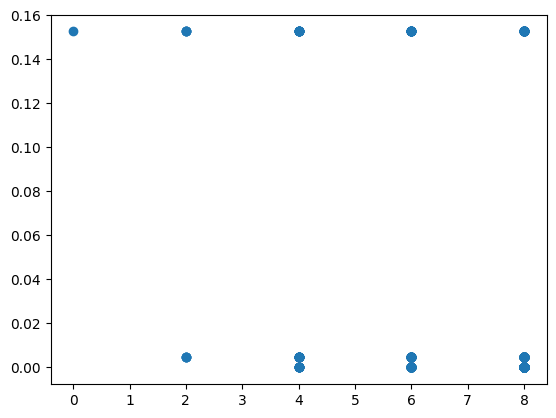

In [38]:
plt.scatter(sorted_sum_arr,sorted_prob_arr)

In [39]:
p_new=p_new/np.sum(p_new)
his=[]
for sam in range(100000):
    qq=np.random.choice(range(len(prob_mat)),p=p_new)
    his.append(qq)

(-1.0, 495.0)

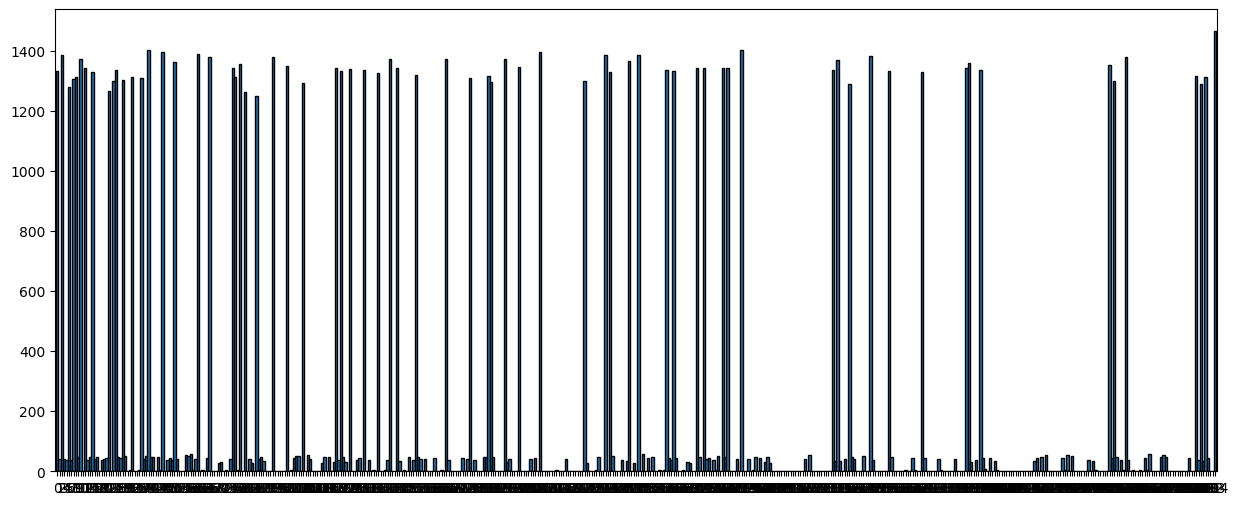

In [40]:
p_new=p_new/np.sum(p_new)



plt.figure(figsize=(15,6))
plt.hist(his,bins=range(min(his), max(his) + 2) ,align='left', edgecolor='black')
plt.xticks(range(max(his)+1))
plt.xlim([-1,max(his)+1])

In [41]:
bin_perm=perm_mat.copy()
bin_prob=prob_mat.copy()
# bin_prob

In [42]:
binn_comb=[]
for pp in bin_perm:
    a=pp[0:4]
    b=pp[4:]
    a=np.sum(a)
    b=np.sum(b)
    binn=[a,b]
    binn_comb.append(binn)

# binn_comb



In [43]:
unique_bin,counts_bin = np.unique(binn_comb,axis=0, return_counts=True)
# (unique_bin)



In [44]:
ind_ar=[]
for u in unique_bin:
    for ind,b in enumerate(binn_comb):
        if np.array_equal(u, b):
            ind_ar.append(ind)
            break


last_prob=[]
for i in ind_ar:
  last_prob.append(bin_prob[i])


h_prob=np.multiply(last_prob,counts_bin)
# h_prob=last_prob

h_mat=h_prob/np.sum(h_prob)
(h_mat)

array([7.67740260e-01, 9.59675325e-02, 1.12461952e-02, 1.17147867e-03,
       1.12114169e-04, 9.59675325e-02, 1.19959416e-02, 1.40577440e-03,
       1.46434833e-04, 1.12461952e-02, 1.40577440e-03, 1.64739188e-04,
       1.17147867e-03, 1.46434833e-04, 1.12114169e-04])

In [45]:
sum=[]
for u in unique_bin:
    ss=np.sum(u)
    sum.append(ss)
    
sorted_indices = np.argsort(np.array(sum))
sorted_indices.reshape(-1)
# Sort the array using the sorted indices
sort_arr=[]
new_bin_ar=[]
p_new=h_mat.copy()
for sor in sorted_indices:
    sort_arr.append(p_new[sor])
    new_bin_ar.append(unique_bin[sor])
# sorted_array
h_mat=sort_arr


In [46]:
new_bin_ar

[array([0, 0]),
 array([0, 2]),
 array([2, 0]),
 array([0, 4]),
 array([2, 2]),
 array([4, 0]),
 array([0, 6]),
 array([2, 4]),
 array([4, 2]),
 array([6, 0]),
 array([0, 8]),
 array([2, 6]),
 array([4, 4]),
 array([6, 2]),
 array([8, 0])]

In [47]:
his=[]
for sam in range(100000):
    qq=np.random.choice(range(len(unique_bin)),p=h_mat)
    his.append(qq)




unique_bin

array([[0, 0],
       [0, 2],
       [0, 4],
       [0, 6],
       [0, 8],
       [2, 0],
       [2, 2],
       [2, 4],
       [2, 6],
       [4, 0],
       [4, 2],
       [4, 4],
       [6, 0],
       [6, 2],
       [8, 0]])

(-1.0, 15.0)

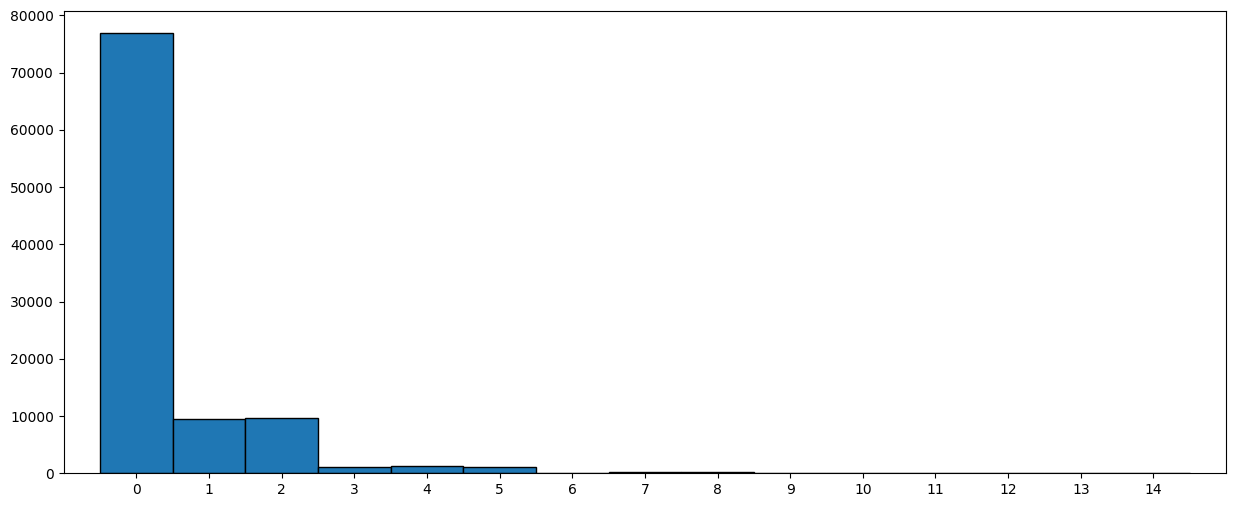

In [48]:


plt.figure(figsize=(15,6))
plt.hist(his,bins=range(min(his), max(his) + 2) ,align='left', edgecolor='black')
plt.xticks(range(max(his)+1))
plt.xlim([-1,max(his)+1])
